# Carga de librerías

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

# Carga

In [3]:
# Cargar conjuntos de datos
train_csv = pd.read_csv('data/train.csv')
validation_csv = pd.read_csv('data/validation.csv')
test_csv = pd.read_csv('data/test.csv')

# Separar datos y etiquetas
feature_cols = train_csv.columns.values.tolist()[1:]
X_train = train_csv[feature_cols]
y_train = train_csv['RiskPerformance']
X_validation = validation_csv[feature_cols]
y_validation = validation_csv['RiskPerformance']
X_test = test_csv[feature_cols]
y_test = test_csv['RiskPerformance']

In [4]:
# Comprobar rangos de valores
print(X_train.describe())

# Normalizar los datos

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_validation = pd.DataFrame(scaler.transform(X_validation))
X_test = pd.DataFrame(scaler.transform(X_test))


       ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
count           6459.000000            6459.000000                6459.000000   
mean              67.563090             183.783558                   8.548847   
std               21.139229             109.572157                  12.708462   
min               -9.000000              -9.000000                  -9.000000   
25%               63.000000             117.000000                   2.500000   
50%               71.000000             177.000000                   5.000000   
75%               80.000000             249.000000                  11.000000   
max               94.000000             603.000000                 227.000000   

       AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
count     6459.000000            6459.000000                  6459.000000   
mean        74.134231              19.403158                     0.053414   
std         38.893707              13.0

In [5]:


# Crear y entrenar el modelo EBM
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred_validation_ebm = ebm.predict(X_validation)

# Evaluar el rendimiento del modelo
validation_accuracy_ebm = accuracy_score(y_validation, y_pred_validation_ebm)
print('Validation accuracy (EBM):', validation_accuracy_ebm)


Validation accuracy (EBM): 0.7145


In [ ]:
# Definir la cuadrícula de hiperparámetros
params_grid = {
    'interactions': [0, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_bins': [128, 256],
    'max_leaves': [3, 5, 7]
}

# Crear el modelo EBM
ebm = ExplainableBoostingClassifier()

# Configurar GridSearchCV
grid_search_ebm = GridSearchCV(estimator=ebm, param_grid=params_grid, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search_ebm.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search_ebm.best_params_
print("Mejores hiperparámetros:", best_params)
print("Mejor accuracy:", grid_search_ebm.best_score_)


In [7]:
params_grid = {
    'smoothing_rounds': [200, 500],
    'interactions': [0.75, 0.9],
    'inner_bags': [0, 1],
    'max_bins': [1024, 4096]
}

# Crear el modelo EBM
ebm = ExplainableBoostingClassifier()

# Configurar GridSearchCV
grid_search_ebm = GridSearchCV(estimator=ebm, param_grid=params_grid, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search_ebm.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search_ebm.best_params_
print("Mejores hiperparámetros:", best_params)
print("Mejor accuracy:", round(grid_search_ebm.best_score_, 4))


Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 0.75, 'max_bins': 4096, 'smoothing_rounds': 200}
Mejor accuracy: 0.7326


In [8]:
params_grid = {
    'smoothing_rounds': [100, 200, 500],
    'interactions': [0.75, 0.9, 5],
    'inner_bags': [0, 1, 2],
    'max_bins': [1024, 4096, 16384]
}

# Crear el modelo EBM
ebm = ExplainableBoostingClassifier()

# Configurar GridSearchCV
grid_search_ebm = GridSearchCV(estimator=ebm, param_grid=params_grid, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search_ebm.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search_ebm.best_params_
print("Mejores hiperparámetros:", best_params)
print("Mejor accuracy:", round(grid_search_ebm.best_score_, 4))

Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 0.75, 'max_bins': 4096, 'smoothing_rounds': 200}
Mejor accuracy: 0.7326


Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 0.75, 'max_bins': 4096, 'smoothing_rounds': 200}

Mejor accuracy: 0.7326

In [36]:

params_grid = {
    'smoothing_rounds': [0, 50, 100, 200, 500, 1000, 2000, 4000],
    'interactions': [0, 0.5, 0.75, 0.9, 0.95, 5, 10, 25, 50, 100, 250],
    'inner_bags': [0, 1, 2, 5],
    'max_bins': [1024, 4096, 16384, 65536],
    'max_interaction_bins': [8, 16, 32, 64, 128, 256]
}

# Crear el modelo EBM
ebm_random = ExplainableBoostingClassifier()

# Configurar RandomizedSearchCV
random_search_ebm = RandomizedSearchCV(estimator=ebm_random, param_distributions=params_grid, scoring='accuracy', n_iter=40, n_jobs=-1, random_state=RANDOM_STATE)

# Entrenar el modelo con RandomizedSearchCV
random_search_ebm.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params_random = random_search_ebm.best_params_
print("Mejores hiperparámetros (Random Search):", best_params_random)
print("Mejor accuracy (Random Search):", random_search_ebm.best_score_)

Mejores hiperparámetros (Random Search): {'smoothing_rounds': 2000, 'max_interaction_bins': 16, 'max_bins': 1024, 'interactions': 0.95, 'inner_bags': 1}
Mejor accuracy (Random Search): 0.7321566549078762


In [37]:
params_grid = {
    'smoothing_rounds': [100, 200, 500, 1000],
    'interactions': [0.5, 0.75, 0.9, 5],
    'inner_bags': [0, 1, 2],
    'max_bins': [1024, 4096, 16384]
}

# Crear el modelo EBM
ebm = ExplainableBoostingClassifier()

# Configurar GridSearchCV
grid_search_ebm = GridSearchCV(estimator=ebm, param_grid=params_grid, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search_ebm.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search_ebm.best_params_
print("Mejores hiperparámetros:", best_params)
print("Mejor accuracy:", round(grid_search_ebm.best_score_, 4))

Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 0.5, 'max_bins': 1024, 'smoothing_rounds': 200}
Mejor accuracy: 0.7326


Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 0.5, 'max_bins': 1024, 'smoothing_rounds': 200}
Mejor accuracy: 0.7326

Prueba1

In [71]:
params_grid = {
    'smoothing_rounds': [50, 100, 200, 500, 1000, 2000, 4000],
    'interactions': [0.5, 0.75, 0.9, 5, 10],
    'inner_bags': [0, 1, 2],
    'max_bins': [1024, 4096, 16384, 65536]
}

# Crear el modelo EBM
ebm = ExplainableBoostingClassifier()

# Configurar GridSearchCV
grid_search_ebm = GridSearchCV(estimator=ebm, param_grid=params_grid, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search_ebm.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search_ebm.best_params_
print("Mejores hiperparámetros:", best_params)
print("Mejor accuracy:", round(grid_search_ebm.best_score_, 4))

Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 10, 'max_bins': 1024, 'smoothing_rounds': 50}
Mejor accuracy: 0.7334


Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 10, 'max_bins': 1024, 'smoothing_rounds': 50}
Mejor accuracy: 0.7334

Prueba 2

In [72]:
params_grid = {
    'smoothing_rounds': [50, 100, 200, 500, 1000, 2000, 4000],
    'interactions': [0.5, 0.75, 0.9, 0.95, 5, 10, 50],
    'inner_bags': [0, 1, 2, 5, 10],
    'max_bins': [1024, 4096, 16384, 65536]
}

# Crear el modelo EBM
ebm = ExplainableBoostingClassifier()

# Configurar GridSearchCV
grid_search_ebm = GridSearchCV(estimator=ebm, param_grid=params_grid, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search_ebm.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search_ebm.best_params_
print("Mejores hiperparámetros:", best_params)
print("Mejor accuracy:", round(grid_search_ebm.best_score_, 4))

Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 50, 'max_bins': 4096, 'smoothing_rounds': 100}
Mejor accuracy: 0.7334


Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 50, 'max_bins': 4096, 'smoothing_rounds': 100}
Mejor accuracy: 0.7334

# Entrenamiento del modelo

In [53]:
best_params

{'inner_bags': 0,
 'interactions': 0.5,
 'max_bins': 1024,
 'smoothing_rounds': 200}

Usados:

{'inner_bags': 0,
 'interactions': 0.5,
 'max_bins': 1024,
 'smoothing_rounds': 200}

In [31]:
# Crear el modelo EBM con los mejores hiperparámetros
ebm_final = ExplainableBoostingClassifier(inner_bags=0, interactions=10, max_bins=1024, smoothing_rounds=50, feature_names=feature_cols)

# Entrenar el modelo
ebm_final.fit(X_train, y_train)

y_pred_train = ebm_final.predict(X_train)
y_pred_validation = ebm_final.predict(X_validation)

# Evaluar el rendimiento del modelo
train_accuracy = accuracy_score(y_train, y_pred_train)
validation_accuracy = accuracy_score(y_validation, y_pred_validation)
print('Accuracy entrenamiento:', train_accuracy)
print('Accuracy validación:', validation_accuracy)

Accuracy entrenamiento: 0.7436135624709708
Accuracy validación: 0.7115


In [32]:
y_pred_test = ebm_final.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
print('Test accuracy:', test_accuracy)

Test accuracy: 0.7489406779661016


In [33]:
report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

         Bad       0.76      0.77      0.77      1015
        Good       0.73      0.72      0.73       873

    accuracy                           0.75      1888
   macro avg       0.75      0.75      0.75      1888
weighted avg       0.75      0.75      0.75      1888



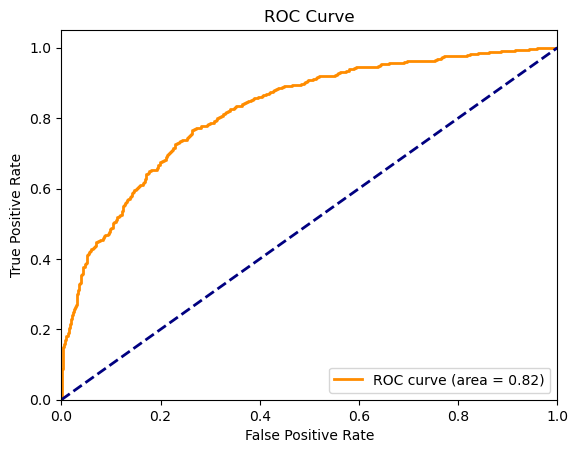

ROC AUC: 0.8215


In [34]:
# Graficar la curva ROC usando las variables existentes
y_pred_proba = ebm_final.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test.map({'Bad': 0, 'Good': 1}), y_pred_proba)
roc_auc = roc_auc_score(y_test.map({'Bad': 0, 'Good': 1}), y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Calcular ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC:', round(roc_auc, 4))

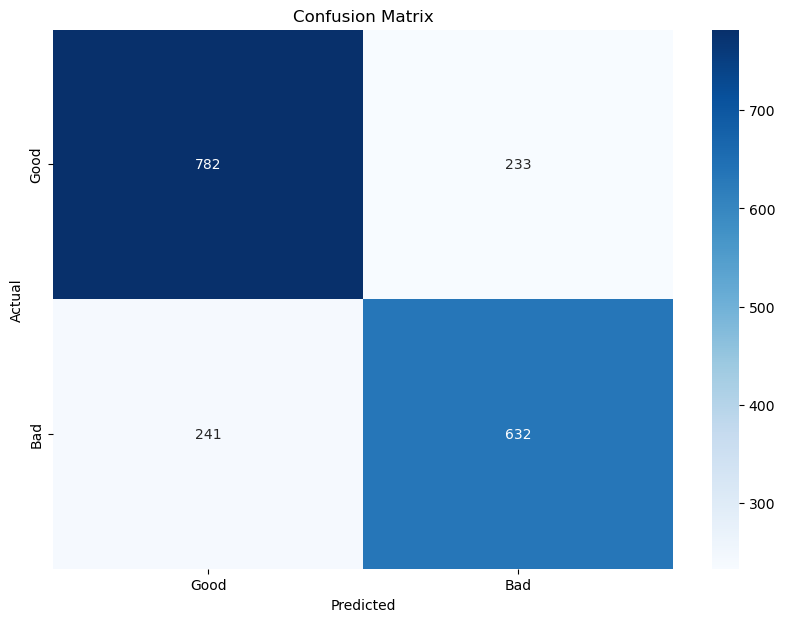

In [35]:

conf_matrix = confusion_matrix(y_test, y_pred_test)

# Dibujar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Explicabilidad del modelo

## Explicabilidad global

In [36]:
ebm_global = ebm_final.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7001/2177341152608/ -->

## Interpretabilidad local

In [37]:
X_test[:5]

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.067979,0.659128,-0.200578,1.102211,-0.644779,0.373751,0.477805,0.514425,-0.674621,0.553627,...,-1.199782,0.060831,-0.271984,-0.256709,-0.608265,-1.100490,-0.263639,-2.180668,0.008495,0.190954
1,-0.310494,0.659128,0.822441,-0.157730,-0.414587,-0.021090,0.057464,0.014451,-0.335631,-0.243848,...,0.043463,0.060831,0.381568,0.074114,1.037221,0.697062,-0.035834,0.504967,0.306688,0.878834
2,0.115288,-1.339710,-0.357966,-1.391958,-0.030935,-0.021090,0.057464,0.514425,-0.674621,0.553627,...,-0.603025,0.060831,0.708344,0.735758,0.365594,0.815322,-0.263639,0.260818,0.306688,-0.424518
3,0.257215,0.650000,0.586360,0.665089,1.580407,-0.021090,0.057464,0.514425,-0.674621,0.553627,...,-0.453835,0.060831,0.054792,0.074114,1.608103,-1.100490,3.381247,0.016670,3.885013,0.661609
4,0.730306,1.955178,-0.436660,1.127924,0.736371,-0.021090,0.057464,0.514425,-0.674621,0.553627,...,-0.055997,0.060831,0.708344,0.735758,-0.306033,1.146451,0.647582,0.504967,0.008495,0.263362


In [38]:
ebm_local = ebm_final.explain_local(X_test[:5], y_test[:5], name='EBM')
show(ebm_local, 0)

<!-- http://127.0.0.1:7001/2177341111904/ -->

## Modelos de caja negra

In [19]:
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred_validation_rf = random_forest.predict(X_validation)

# Evaluar el rendimiento del modelo
validation_accuracy_rf = accuracy_score(y_validation, y_pred_validation_rf)
print('Validation accuracy (Random Forest):', validation_accuracy_rf)

Validation accuracy (Random Forest): 0.7095


In [70]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 2000, num = 40)],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [10, 50, 100, 200, None]
}

RF_randomizedSearch = RandomForestClassifier()
randomized_search = RandomizedSearchCV(RF_randomizedSearch, param_grid, random_state=RANDOM_STATE, n_jobs=-1, n_iter = 100, scoring='accuracy')

randomized_search.fit(X_train, y_train)

best_params_rf = randomized_search.best_params_
print("Mejores hiperparámetros:", best_params_rf)
print("Mejor accuracy:", randomized_search.best_score_)

Mejores hiperparámetros: {'n_estimators': 1850, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'gini'}
Mejor accuracy: 0.7298341938593694


Mejores hiperparámetros: {'n_estimators': 1500, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'log_loss'}
Mejor accuracy: 0.7287508423402792

In [73]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 2000, num = 40)],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [10, 50, 100, 200, None]
}

RF_randomizedSearch = RandomForestClassifier()
randomized_search = RandomizedSearchCV(RF_randomizedSearch, param_grid, random_state=RANDOM_STATE, n_jobs=-1, n_iter = 500, scoring='accuracy')

randomized_search.fit(X_train, y_train)

best_params_rf = randomized_search.best_params_
print("Mejores hiperparámetros:", best_params_rf)
print("Mejor accuracy:", randomized_search.best_score_)

Mejores hiperparámetros: {'n_estimators': 600, 'max_features': 'log2', 'max_depth': 100, 'criterion': 'log_loss'}
Mejor accuracy: 0.730918504627176


In [22]:
random_forest_final = RandomForestClassifier(n_estimators=600, max_features = 'log2', max_depth = 100, criterion = 'log_loss', random_state=RANDOM_STATE)

# Entrenar el modelo
random_forest_final.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=100, max_features='log2',
                       n_estimators=600, random_state=123)

In [23]:

# Predecir en el conjunto de validación
y_pred_test_rf = random_forest_final.predict(X_test)

# Evaluar el rendimiento del modelo
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print('Test accuracy:', test_accuracy_rf)
report_rf = classification_report(y_test, y_pred_test_rf)
print(report_rf)


Test accuracy: 0.7351694915254238
              precision    recall  f1-score   support

         Bad       0.74      0.78      0.76      1015
        Good       0.73      0.69      0.71       873

    accuracy                           0.74      1888
   macro avg       0.73      0.73      0.73      1888
weighted avg       0.73      0.74      0.73      1888



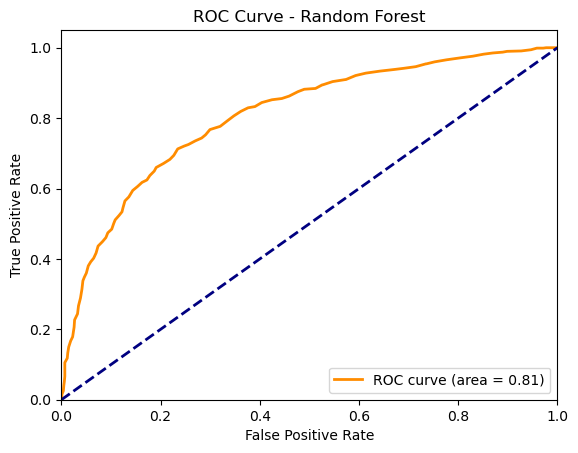

ROC AUC (Random Forest): 0.8061


In [24]:
# Graficar la curva ROC usando las variables existentes para random_forest
y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test.map({'Bad': 0, 'Good': 1}), y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test.map({'Bad': 0, 'Good': 1}), y_pred_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Calcular ROC AUC para random_forest
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print('ROC AUC (Random Forest):', round(roc_auc_rf, 4))